## Python - Predicting wine type and quality
#### Using machine learning algorithms to predict wine type (red or white) and quality


#### Summary

1. Dataset
2. Problem
3. Data loading and preprocessing
4. Exploratory data analysis and visualization
5. Feature engineering\
    5.1 Wine quality\
    5.2 Wine type
6. Model selection and training\
    6.1. Wine quality\
    6.2. Wine type

#### Dataset

The datasets are available at:

- white_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
- red_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

#### Problem

The main goal of this study is to obtain predictive models able to classify wines according to type and quality.
- Type has two levels - Red or White
- Quality varies from 0 to 10

#### Data loading and preprocessing

In [352]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif


warnings.filterwarnings('ignore')

In [353]:
df_white = pd.read_csv(
    "C:/Users/Gustavo/OneDrive/Data_Science/wine_quality/winequality-white.csv", sep=";")
df_red = pd.read_csv(
    "C:/Users/Gustavo/OneDrive/Data_Science/wine_quality/winequality-red.csv")

In [95]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
# add columns with labels for each wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

In [98]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [99]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [100]:
# check shapes
df_red.shape, df_white.shape

((1599, 13), (4898, 13))

In [101]:
# join the two dataframes
df_wine_full = pd.concat([df_red, df_white], axis=0)

In [102]:
# check shape again
df_wine_full.shape

(6497, 13)

In [ ]:
# remove spaces from column names
df_wine_full.columns = df_wine_full.columns.str.replace(' ', '_')

In [ ]:
# check column names
df_wine_full.head()

#### 4. Exploratory data analysis and visualization

In [103]:
# describe the dataset
df_wine_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [106]:
# check for NAs
df_wine_full.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

The dataset have two columns with labels (quality and type) which will be used to classify the wines, therefore, it is important to see the distribution of the data among these labels

In [107]:
df_wine_full.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [295]:
# change type format to be considered as differente classes and not numbers
df_wine_full['quality'] = df_wine_full['quality'].astype('category')

<AxesSubplot:xlabel='type', ylabel='count'>

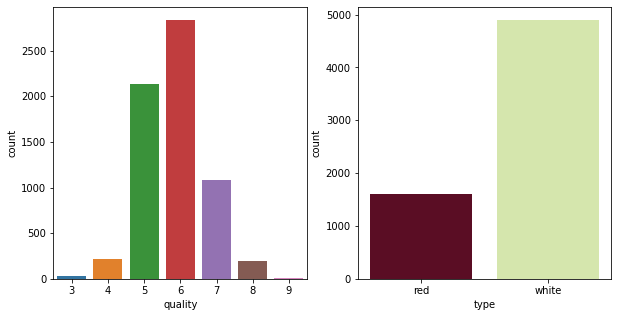

In [296]:
# plot quality levels
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df_wine_full, x='quality', ax=axes[0])
sns.countplot(data=df_wine_full, x='type',
              ax=axes[1], palette=['#67001f', "#d9f0a3"])

We can see that the classes are very unbalanced for the two parameters, quality and type. Unbalanced classes may result in biased predictions, so it's important to evaluate how this unbalancing may affect the predictions. There are many approaches to lead with unbalanced classes when applying classification models, such as under and oversampling methods, and use of different weights for the classes in the models. Here, I will be using the approach of setting weights for each class in the ML model.

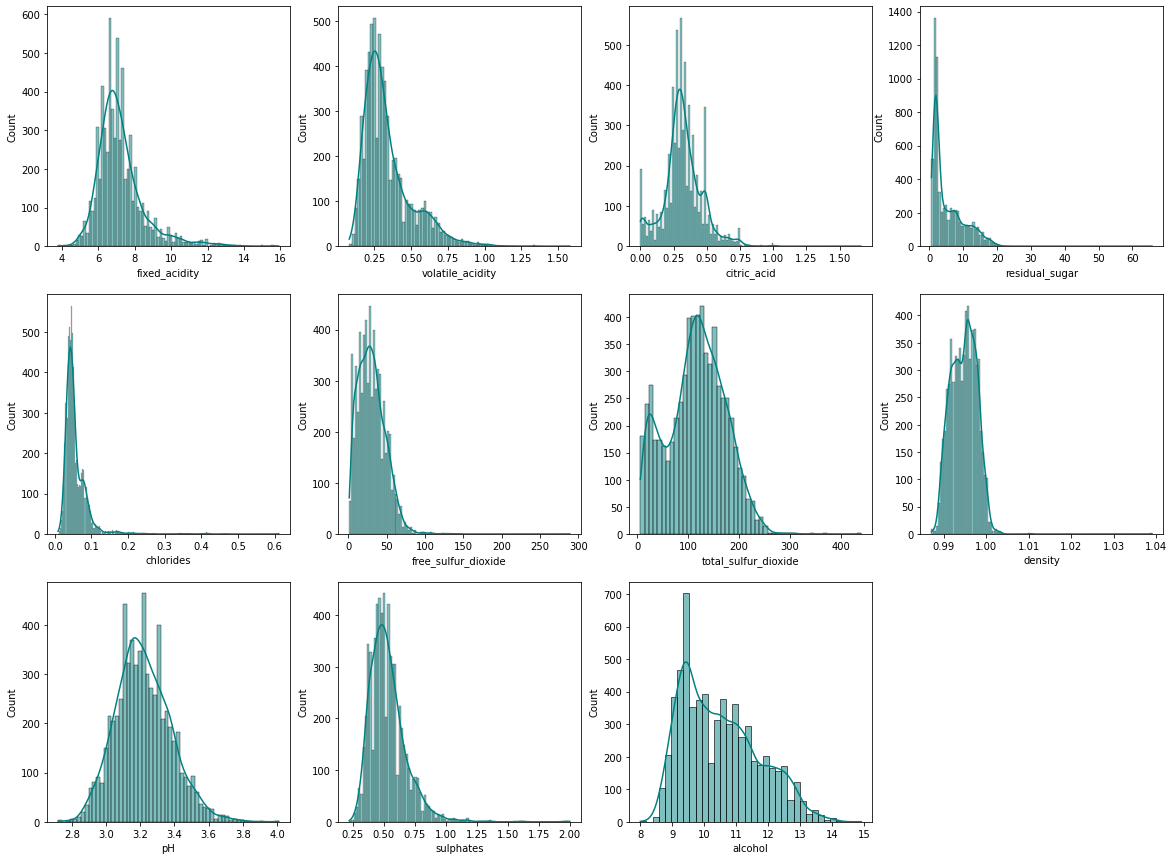

In [297]:
# Plot histogram to understand the distribution

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

sns.histplot(data=df_wine_full, x="fixed_acidity",
             kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df_wine_full, x="volatile_acidity",
             kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df_wine_full, x="citric_acid",
             kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df_wine_full, x="residual_sugar",
             kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=df_wine_full, x="chlorides",
             kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df_wine_full, x="free_sulfur_dioxide",
             kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_wine_full, x="total_sulfur_dioxide",
             kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df_wine_full, x="density",
             kde=True, color="teal", ax=axs[1, 3])
sns.histplot(data=df_wine_full, x="pH", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df_wine_full, x="sulphates",
             kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df_wine_full, x="alcohol",
             kde=True, color="teal", ax=axs[2, 2])

fig.delaxes(axs[2, 3])

<AxesSubplot:>

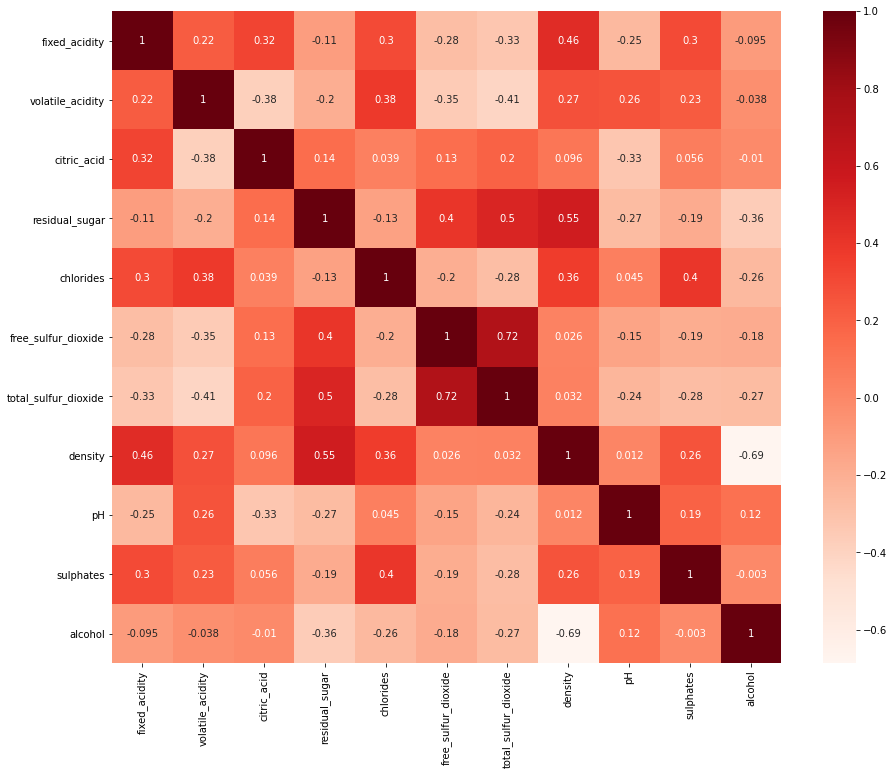

In [111]:
# check correlations between variables
corr_wine = df_wine_full.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_wine, annot=True, cmap=plt.cm.Reds)

Total sulfur dioxide and free sulfur dioxide are positively correlated which means that it can be difficult to separate their effects on the response variable. This situation may require some additional knowledge on the chemical function of the sulfur dioxide on wine characteristics.

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='total_sulfur_dioxide'>

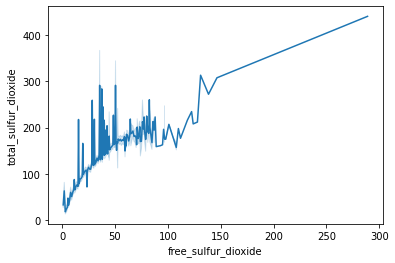

In [112]:
# plot to chech the correlation of sulfur dioxide types
sns.lineplot(x="free_sulfur_dioxide",
             y="total_sulfur_dioxide", data=df_wine_full)

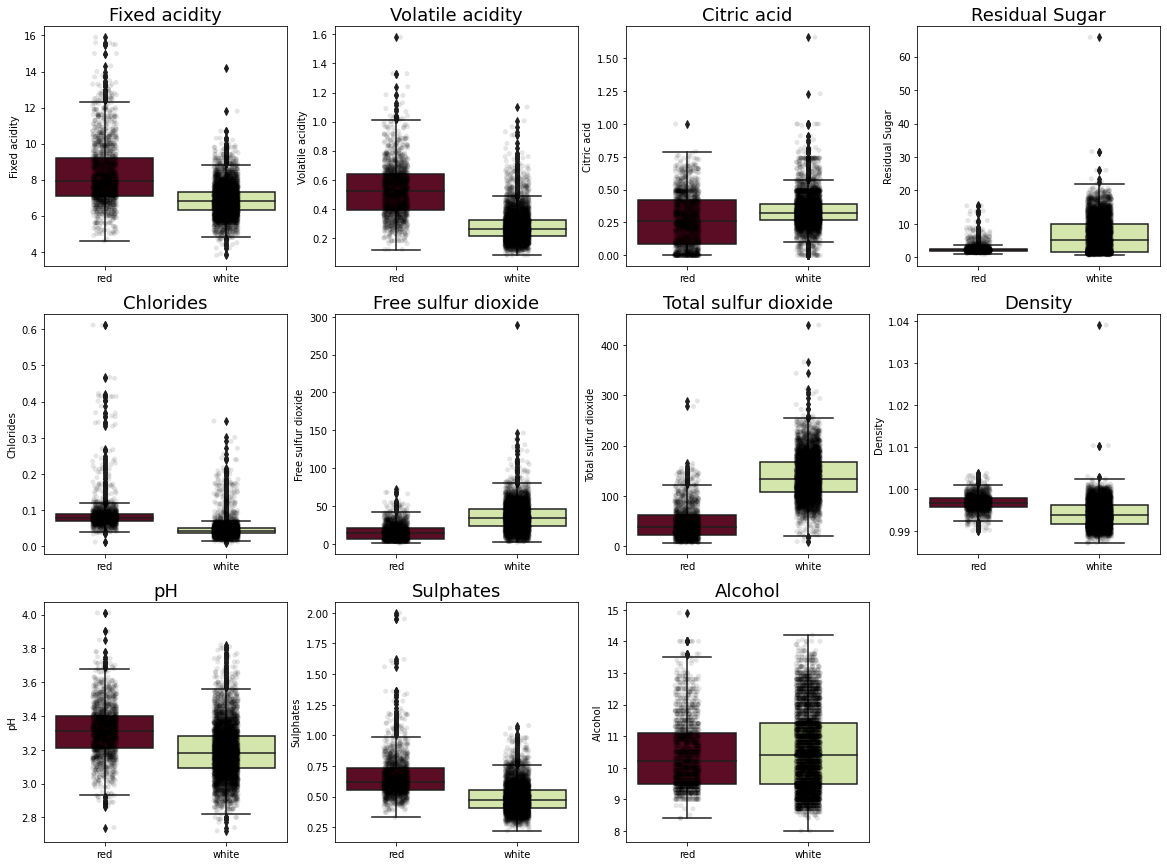

In [21]:
# visualize the relationship between each attribute and wine type

f, axes = plt.subplots(3, 4, figsize=(20, 15))

# fixed acidity
sns.boxplot(x='type', y='fixed_acidity', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 0])
sns.stripplot(x='type', y='fixed_acidity', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 0])
axes[0, 0].set_title("Fixed acidity", fontsize=18)
axes[0, 0].set_ylabel("Fixed acidity")
axes[0, 0].set_xlabel("")

# volatile acidity
sns.boxplot(x='type', y='volatile_acidity', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 1])
sns.stripplot(x='type', y='volatile_acidity', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 1])
axes[0, 1].set_title("Volatile acidity", fontsize=18)
axes[0, 1].set_ylabel("Volatile acidity")
axes[0, 1].set_xlabel("")

# citric acid
sns.boxplot(x='type', y='citric_acid', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 2])
sns.stripplot(x='type', y='citric_acid', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 2])
axes[0, 2].set_title("Citric acid", fontsize=18)
axes[0, 2].set_ylabel("Citric acid")
axes[0, 2].set_xlabel("")

# residual sugar
sns.boxplot(x='type', y='residual_sugar', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[0, 3])
sns.stripplot(x='type', y='residual_sugar', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[0, 3])
axes[0, 3].set_title("Residual Sugar", fontsize=18)
axes[0, 3].set_ylabel("Residual Sugar")
axes[0, 3].set_xlabel("")

# chlorides
sns.boxplot(x='type', y='chlorides', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 0])
sns.stripplot(x='type', y='chlorides', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 0])
axes[1, 0].set_title("Chlorides", fontsize=18)
axes[1, 0].set_ylabel("Chlorides")
axes[1, 0].set_xlabel("")

# free sulfur dioxide
sns.boxplot(x='type', y='free_sulfur_dioxide', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 1])
sns.stripplot(x='type', y='free_sulfur_dioxide', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 1])
axes[1, 1].set_title("Free sulfur dioxide", fontsize=18)
axes[1, 1].set_ylabel("Free sulfur dioxide")
axes[1, 1].set_xlabel("")

# total sulfur dioxide
sns.boxplot(x='type', y='total_sulfur_dioxide', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 2])
sns.stripplot(x='type', y='total_sulfur_dioxide', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 2])
axes[1, 2].set_title("Total sulfur dioxide", fontsize=18)
axes[1, 2].set_ylabel("Total sulfur dioxide")
axes[1, 2].set_xlabel("")

# density
sns.boxplot(x='type', y='density', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[1, 3])
sns.stripplot(x='type', y='density', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[1, 3])
axes[1, 3].set_title("Density", fontsize=18)
axes[1, 3].set_ylabel("Density")
axes[1, 3].set_xlabel("")

# ph
sns.boxplot(x='type', y='pH', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 0])
sns.stripplot(x='type', y='pH', color='black', alpha=0.1,
              data=df_wine_full, ax=axes[2, 0])
axes[2, 0].set_title("pH", fontsize=18)
axes[2, 0].set_ylabel("pH")
axes[2, 0].set_xlabel("")

# sulphates
sns.boxplot(x='type', y='sulphates', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 1])
sns.stripplot(x='type', y='sulphates', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[2, 1])
axes[2, 1].set_title("Sulphates", fontsize=18)
axes[2, 1].set_ylabel("Sulphates")
axes[2, 1].set_xlabel("")

# alcohol
sns.boxplot(x='type', y='alcohol', palette=[
            '#67001f', "#d9f0a3"], data=df_wine_full, ax=axes[2, 2])
sns.stripplot(x='type', y='alcohol', color='black',
              alpha=0.1, data=df_wine_full, ax=axes[2, 2])
axes[2, 2].set_title("Alcohol", fontsize=18)
axes[2, 2].set_ylabel("Alcohol")
axes[2, 2].set_xlabel("")

f.delaxes(axes[2, 3])

There are some clearly differences between red and white types for some of the wine charachteristics (e.g., volatile acidity and total sulfur dioxide). Alcohol and citric acid seems to not differ (comparing the medians) between wine types - maybe these two features could be removed from the analysis, but it is better to check through a statistical test. The total sulfur dioxide shows to be a better predictor of wine types than the free sulfur dioxide. As we observed in the correlation matrix they are higly correlated therefore I will consider only the the total sulfur for the analysis.

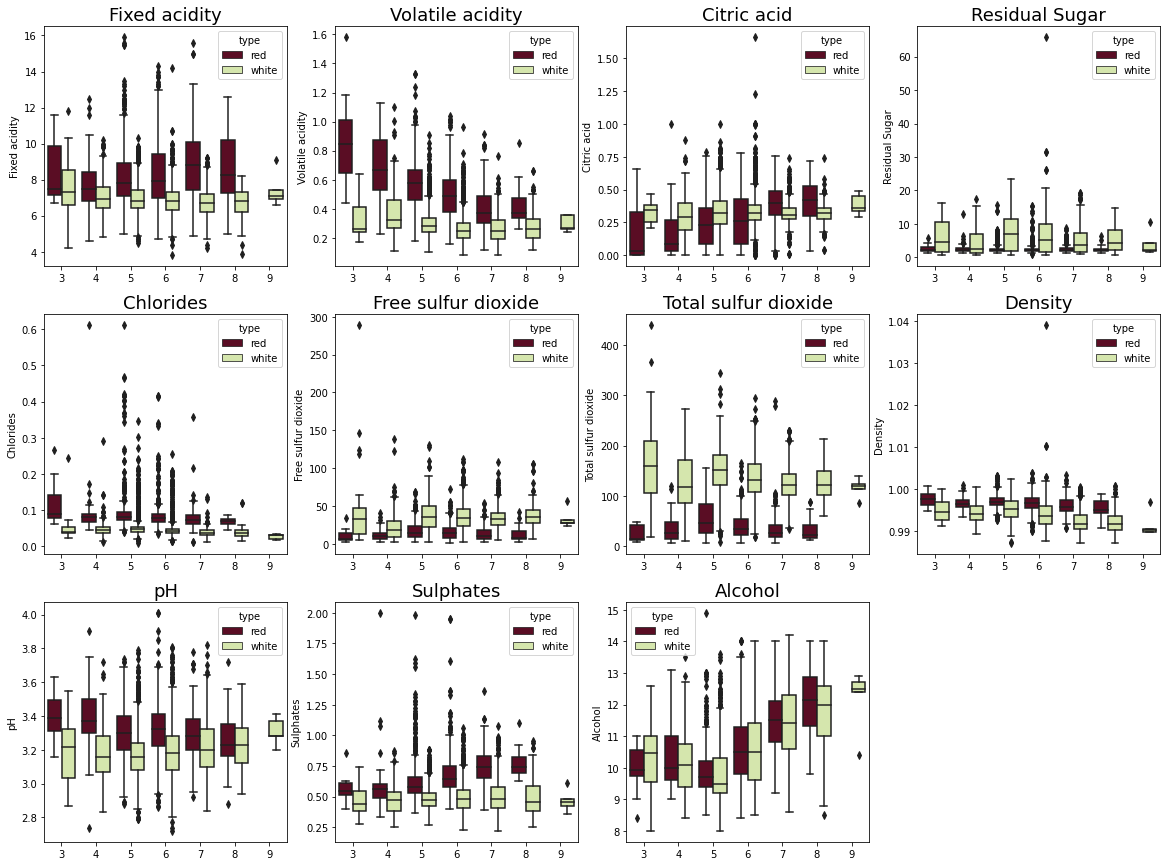

In [298]:
# visualize the relationship between each attribute and the quality index

f, axes = plt.subplots(3, 4, figsize = (20, 15))

# fixed acidity
sns.boxplot(x = 'quality', y = 'fixed_acidity', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 0])
axes[0, 0].set_title("Fixed acidity", fontsize = 18)
axes[0, 0].set_ylabel("Fixed acidity")
axes[0, 0].set_xlabel("")

# volatile acidity
sns.boxplot(x = 'quality', y = 'volatile_acidity', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 1])
axes[0, 1].set_title("Volatile acidity", fontsize = 18)
axes[0, 1].set_ylabel("Volatile acidity")
axes[0, 1].set_xlabel("")

# citric acid
sns.boxplot(x = 'quality', y = 'citric_acid', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 2])
axes[0, 2].set_title("Citric acid", fontsize = 18)
axes[0, 2].set_ylabel("Citric acid")
axes[0, 2].set_xlabel("")

# residual sugar
sns.boxplot(x = 'quality', y = 'residual_sugar', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[0, 3])
axes[0, 3].set_title("Residual Sugar", fontsize = 18)
axes[0, 3].set_ylabel("Residual Sugar")
axes[0, 3].set_xlabel("")

# chlorides
sns.boxplot(x = 'quality', y = 'chlorides', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 0])
axes[1, 0].set_title("Chlorides", fontsize = 18)
axes[1, 0].set_ylabel("Chlorides")
axes[1, 0].set_xlabel("")

# free sulfur dioxide
sns.boxplot(x = 'quality', y = 'free_sulfur_dioxide', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 1])
axes[1, 1].set_title("Free sulfur dioxide", fontsize = 18)
axes[1, 1].set_ylabel("Free sulfur dioxide")
axes[1, 1].set_xlabel("")

# total sulfur dioxide 
sns.boxplot(x = 'quality', y = 'total_sulfur_dioxide', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 2])
axes[1, 2].set_title("Total sulfur dioxide", fontsize = 18)
axes[1, 2].set_ylabel("Total sulfur dioxide")
axes[1, 2].set_xlabel("")

# density 
sns.boxplot(x = 'quality', y = 'density', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[1, 3])
axes[1, 3].set_title("Density", fontsize = 18)
axes[1, 3].set_ylabel("Density")
axes[1, 3].set_xlabel("")

# ph 
sns.boxplot(x = 'quality', y = 'pH', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 0])
axes[2, 0].set_title("pH", fontsize = 18)
axes[2, 0].set_ylabel("pH")
axes[2, 0].set_xlabel("")

# sulphates 
sns.boxplot(x = 'quality', y = 'sulphates', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 1])
axes[2, 1].set_title("Sulphates", fontsize = 18)
axes[2, 1].set_ylabel("Sulphates")
axes[2, 1].set_xlabel("")

# alcohol 
sns.boxplot(x = 'quality', y = 'alcohol', hue="type", palette=['#67001f',"#d9f0a3"], data = df_wine_full, ax=axes[2, 2])
axes[2, 2].set_title("Alcohol", fontsize = 18)
axes[2, 2].set_ylabel("Alcohol")
axes[2, 2].set_xlabel("")

f.delaxes(axes[2,3])

- We can observe that as the alcohol content increases the quality index also increases.
- For red wines, the volatile acidity may be a good predictor of quality. Higher quality wines have lower volatile acidity values.

In [299]:
# New df removing the free sulfur dioxide
df_wine_full_2 = df_wine_full.drop('free_sulfur_dioxide', axis=1)

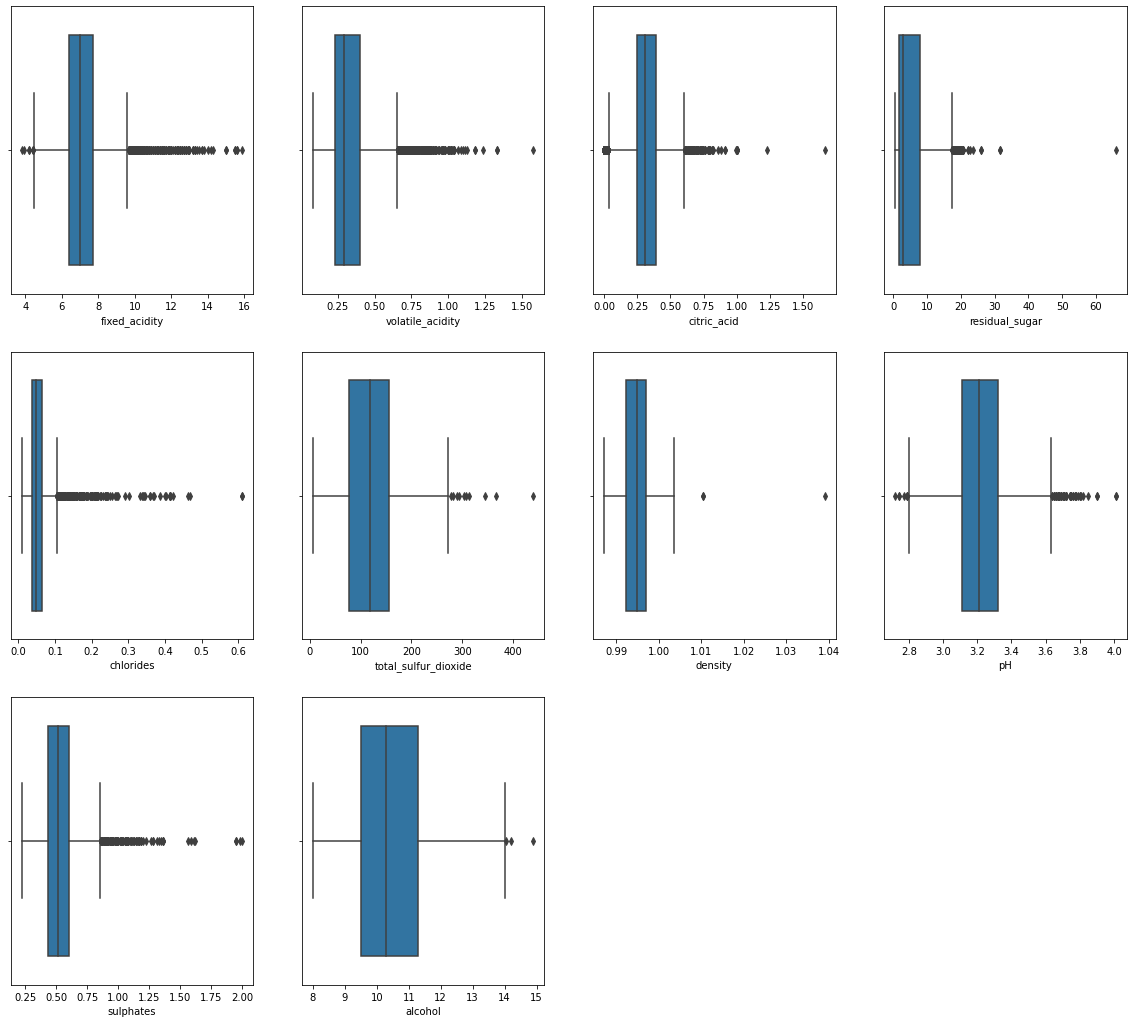

In [300]:
features = list(df_wine_full_2.columns.drop('quality'))

plt.figure(figsize=(20, 18))

for i in range(0, 10):
    plt.subplot(3, 4, i+1)
    sns.boxplot(df_wine_full_2[features[i]])

Using the interquartile range method to detect and remove outliers from the dataset 

In [303]:
df_wine_full[features]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,white
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,white
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,white
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,white


In [304]:
ft_cols = ['fixed_acidity',
           'volatile_acidity',
           'citric_acid',
           'residual_sugar',
           'chlorides',
           'total_sulfur_dioxide',
           'density',
           'pH',
           'sulphates',
           'alcohol']

In [305]:
# function to remove outliers usinf the interquartile range method

def remove_outliers(df, ft_cols):
    
    # Calculate quantiles and IQR
    Q1 = df[ft_cols].quantile(0.25)
    Q3 = df[ft_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Identify the outliers in each feature column
    filter_outlier = ((df[ft_cols] < (
        Q1 - 1.5 * IQR)) | (df[ft_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Remove the outliers from the DataFrame
    df_new = df[~filter_outlier]

    return df_new

In [306]:
df_wine_new = remove_outliers(df_wine_full_2, ft_cols)

In [335]:
df_wine_new


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
6,7.9,0.60,0.06,1.6,0.069,59.0,0.99640,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,102.0,0.99780,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,65.0,0.99590,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,102.0,0.99780,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,103.0,0.99690,3.30,0.75,10.5,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,7,white


#### 5. Feature engineering

##### 5.1 Wine quality

In [308]:
X_quality = df_wine_new.drop(['quality', 'type'], axis=1)
y_quality = df_wine_new['quality'] 

In [309]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(X_quality, y_quality)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(X_quality.columns)):
    feature_scores[X_quality.columns[i]] = f_values[i],p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

alcohol: (236.34024623148267, 4.933398239903155e-267)
density: (112.57054641317208, 9.3149702424869e-134)
chlorides: (77.51237988544732, 5.490214646127078e-93)
volatile_acidity: (54.43438802213837, 2.2227098245861846e-65)
total_sulfur_dioxide: (11.132130290653562, 2.2510526434389614e-12)
fixed_acidity: (9.500671643497935, 2.0931438890145572e-10)
residual_sugar: (6.356447543151438, 1.1178851875019632e-06)
citric_acid: (6.28959681417822, 1.3372575224155672e-06)
sulphates: (4.202334775586493, 0.0003187376159167999)
pH: (1.779351763390546, 0.09915811743698247)


As we can see, the feature "pH" was not significant (p >= 0.05), that is, do not affect the quality score. Therefore, this feature can be removed from the quality analysis. 

##### 5.2 Wine type

In [310]:
X_type = df_wine_new.drop(['quality', 'type'], axis=1)
y_type = df_wine_new['type'] 

In [311]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(X_type, y_type)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(X_type.columns)):
    feature_scores[X_type.columns[i]] = f_values[i], p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

chlorides: (4823.89989801817, 0.0)
total_sulfur_dioxide: (2668.3210216824195, 0.0)
volatile_acidity: (2401.937300909364, 0.0)
sulphates: (986.7423384475275, 4.5244549815661415e-198)
fixed_acidity: (666.2011758889623, 3.939825231113982e-138)
pH: (638.66501350927, 7.970578393535224e-133)
density: (486.57264009926365, 4.841971926712576e-103)
residual_sugar: (421.31978261872047, 5.238682941858252e-90)
citric_acid: (163.72023602355173, 6.448902907228593e-37)
alcohol: (11.944613286659823, 0.0005525512828154931)


All features seems to significantly affect the wine type. Therefore, all will be considered in the analysis.

#### 6. Model selection and training

##### 6.1 Wine quality

In [318]:
X_quality = df_wine_new.drop(['quality', 'type', 'pH'], axis=1)
y_quality = df_wine_new['quality'] 

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_quality, y_quality, test_size=0.2, shuffle=True, random_state=123)


In [313]:
# steps for the pipeline
steps = [('scale', StandardScaler()),
         ('rf', RandomForestClassifier(class_weight='balanced', random_state=0))]  # applies weights to each class inversely proportional to its frequency in the training data


In [314]:
rf_model = Pipeline(steps)


In [315]:
# fit the model
rf_model.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))])

In [316]:
# make prediction on test data
y_pred = rf_model.predict(X_test)


In [317]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.08      0.15        24
           5       0.75      0.66      0.70       297
           6       0.61      0.84      0.71       432
           7       0.79      0.51      0.62       219
           8       0.83      0.41      0.55        37
           9       0.00      0.00      0.00         2

    accuracy                           0.68      1015
   macro avg       0.57      0.36      0.39      1015
weighted avg       0.70      0.68      0.66      1015



In [319]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")


3: 4
4: 24
5: 297
6: 432
7: 219
8: 37
9: 2


In [320]:
# feature importance
estimator = rf_model.named_steps['rf']

importance = estimator.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10402
Feature: 1, Score: 0.09530
Feature: 2, Score: 0.09348
Feature: 3, Score: 0.12071
Feature: 4, Score: 0.11260
Feature: 5, Score: 0.10562
Feature: 6, Score: 0.13867
Feature: 7, Score: 0.08159
Feature: 8, Score: 0.14801


In [322]:
ft_cols_quality = ['fixed_acidity',
           'volatile_acidity',
           'citric_acid',
           'residual_sugar',
           'chlorides',
           'total_sulfur_dioxide',
           'density',
           'sulphates',
           'alcohol']

In [323]:
df_importance = pd.DataFrame({'features': ft_cols_quality, 'importance': importance})
df_importance

,features,importance
0,fixed_acidity,0.104020
1,volatile_acidity,0.095302
2,citric_acid,0.093483
3,residual_sugar,0.120711
4,chlorides,0.112602
5,total_sulfur_dioxide,0.105622
6,density,0.138669
7,sulphates,0.081586
8,alcohol,0.148006


<AxesSubplot:xlabel='importance', ylabel='features'>

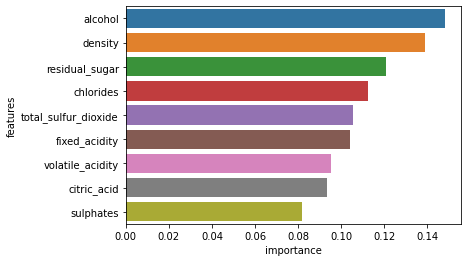

In [324]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

##### 6.2 Wine type

In [343]:
X_type = df_wine_new.drop(['quality', 'type'], axis=1)
y_type = df_wine_new['type']

# encoder = OneHotEncoder() # for binary classification
#y_encoded = encoder.fit_transform(y.values.reshape(-1,1)).toarray()

# Print the first 5 encoded labels


In [344]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_type, y_type, test_size=0.2, shuffle=True, random_state=123)


In [345]:
steps = [('scale', StandardScaler()),
         ('classifier', LogisticRegression(class_weight='balanced'))]


In [346]:
lr_model = Pipeline(steps)
lr_model.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [347]:
y_pred = lr_model.predict(X_test)


In [348]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         red       0.94      0.98      0.96       132
       white       1.00      0.99      0.99       883

    accuracy                           0.99      1015
   macro avg       0.97      0.98      0.98      1015
weighted avg       0.99      0.99      0.99      1015



In [349]:
# feature importance
estimator = lr_model.named_steps['classifier']

importance = estimator.coef_[0]

for i, val in enumerate(importance):
    print("Feature %d importance: %.2f" % (i, val))

Feature 0 importance: 0.52
Feature 1 importance: -0.58
Feature 2 importance: 0.29
Feature 3 importance: 2.59
Feature 4 importance: -1.24
Feature 5 importance: 1.80
Feature 6 importance: -4.54
Feature 7 importance: 0.33
Feature 8 importance: -0.09
Feature 9 importance: -2.63


In [350]:
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,fixed_acidity,0.52
1,volatile_acidity,-0.58
2,citric_acid,0.29
3,residual_sugar,2.59
4,chlorides,-1.24
5,total_sulfur_dioxide,1.80
6,density,-4.54
7,pH,0.33
8,sulphates,-0.09
9,alcohol,-2.63


<AxesSubplot:xlabel='importance', ylabel='features'>

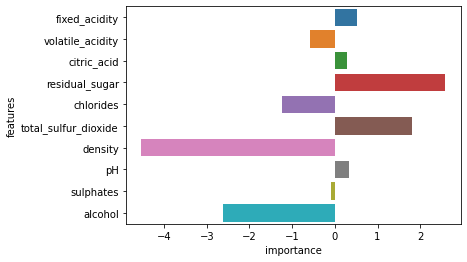

In [351]:
sns.barplot(x='importance', y='features', data=df_importance, orient='h')